In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score)
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [67]:
df_raw = pd.read_pickle("data/preprocessed_data.pkl")

In [68]:
df_raw.columns

Index(['age', 'size', 'organization_name', 'published_at', 'status_changed_at',
       'los', 'breed_secondary', 'breed_mixed', 'good_with_children',
       'good_with_dogs',
       ...
       'color_secondary_Merle (Red)',
       'color_secondary_Red / Chestnut / Orange', 'color_secondary_Sable',
       'color_secondary_Tricolor (Brown, Black, & White)',
       'color_secondary_White / Cream',
       'color_secondary_Yellow / Tan / Blond / Fawn',
       'color_tertiary_Brown / Chocolate',
       'color_tertiary_Red / Chestnut / Orange',
       'color_tertiary_White / Cream',
       'color_tertiary_Yellow / Tan / Blond / Fawn'],
      dtype='object', length=129)

In [73]:
# y = df_raw["los"]

# features = [
#     "age",
#     "size",
#     # "organization_name",
#     # "published_at",
#     # "status_changed_at",
#     # "los",
#     # "breed_secondary",
#     "breed_mixed",
#     "good_with_children",
#     "good_with_dogs",
#     "good_with_cats",
#     "attribute_spayed_neutered",
#     "attribute_house_trained",
#     "attribute_special_needs",
#     "attribute_shots_current",
#     "breed_primary_Akita",
#     "breed_primary_Alaskan Malamute",
#     "breed_primary_American Bulldog",
#     "breed_primary_American Eskimo Dog",
#     "breed_primary_American Staffordshire Terrier",
#     "breed_primary_Australian Cattle Dog / Blue Heeler",
#     "breed_primary_Australian Shepherd",
#     "breed_primary_Basenji",
#     "breed_primary_Beagle",
#     "breed_primary_Belgian Shepherd / Malinois",
#     "breed_primary_Bichon Frise",
#     "breed_primary_Black Labrador Retriever",
#     "breed_primary_Black and Tan Coonhound",
#     "breed_primary_Border Collie",
#     "breed_primary_Border Terrier",
#     "breed_primary_Boston Terrier",
#     "breed_primary_Boxer",
#     "breed_primary_Brussels Griffon",
#     "breed_primary_Bull Terrier",
#     "breed_primary_Cairn Terrier",
#     "breed_primary_Cane Corso",
#     "breed_primary_Cattle Dog",
#     "breed_primary_Cavalier King Charles Spaniel",
#     "breed_primary_Chihuahua",
#     "breed_primary_Chow Chow",
#     "breed_primary_Cocker Spaniel",
#     "breed_primary_Collie",
#     "breed_primary_Corgi",
#     "breed_primary_Dachshund",
#     "breed_primary_Dalmatian",
#     "breed_primary_Dandie Dinmont Terrier",
#     "breed_primary_Doberman Pinscher",
#     "breed_primary_English Bulldog",
#     "breed_primary_Fox Terrier",
#     "breed_primary_French Bulldog",
#     "breed_primary_German Shepherd Dog",
#     "breed_primary_German Shorthaired Pointer",
#     "breed_primary_Golden Retriever",
#     "breed_primary_Goldendoodle",
#     "breed_primary_Great Dane",
#     "breed_primary_Great Pyrenees",
#     "breed_primary_Greyhound",
#     "breed_primary_Havanese",
#     "breed_primary_Hound",
#     "breed_primary_Husky",
#     "breed_primary_Jack Russell Terrier",
#     "breed_primary_Labrador Retriever",
#     "breed_primary_Lhasa Apso",
#     "breed_primary_Maltese",
#     "breed_primary_Manchester Terrier",
#     "breed_primary_Mastiff",
#     "breed_primary_Miniature Pinscher",
#     "breed_primary_Miniature Schnauzer",
#     "breed_primary_Pekingese",
#     "breed_primary_Pembroke Welsh Corgi",
#     "breed_primary_Pit Bull Terrier",
#     "breed_primary_Pointer",
#     "breed_primary_Pomeranian",
#     "breed_primary_Poodle",
#     "breed_primary_Pug",
#     "breed_primary_Rat Terrier",
#     "breed_primary_Retriever",
#     "breed_primary_Rhodesian Ridgeback",
#     "breed_primary_Rottweiler",
#     "breed_primary_Saint Bernard",
#     "breed_primary_Schipperke",
#     "breed_primary_Schnauzer",
#     "breed_primary_Shar-Pei",
#     "breed_primary_Shepherd",
#     "breed_primary_Shetland Sheepdog / Sheltie",
#     "breed_primary_Shiba Inu",
#     "breed_primary_Shih Tzu",
#     "breed_primary_Shih poo",
#     "breed_primary_Siberian Husky",
#     "breed_primary_Spaniel",
#     "breed_primary_Staffordshire Bull Terrier",
#     "breed_primary_Terrier",
#     "breed_primary_Vizsla",
#     "breed_primary_West Highland White Terrier / Westie",
#     "breed_primary_Wheaten Terrier",
#     "breed_primary_Yellow Labrador Retriever",
#     "breed_primary_Yorkshire Terrier",
#     "gender_Female",
#     "gender_Male",
#     "coat_Curly",
#     "coat_Long",
#     "coat_Medium",
#     "coat_Short",
#     "coat_Wire",
#     "color_primary_Apricot / Beige",
#     "color_primary_Bicolor",
#     "color_primary_Black",
#     "color_primary_Brindle",
#     "color_primary_Brown / Chocolate",
#     "color_primary_Golden",
#     "color_primary_Gray / Blue / Silver",
#     "color_primary_Merle (Blue)",
#     "color_primary_Merle (Red)",
#     "color_primary_Red / Chestnut / Orange",
#     "color_primary_Sable",
#     "color_primary_Tricolor (Brown, Black, & White)",
#     "color_primary_White / Cream",
#     "color_primary_Yellow / Tan / Blond / Fawn",
#     "color_secondary_Apricot / Beige",
#     "color_secondary_Black",
#     "color_secondary_Brindle",
#     "color_secondary_Brown / Chocolate",
#     "color_secondary_Golden",
#     "color_secondary_Gray / Blue / Silver",
#     "color_secondary_Merle (Blue)",
#     "color_secondary_Merle (Red)",
#     "color_secondary_Red / Chestnut / Orange",
#     "color_secondary_Tricolor (Brown, Black, & White)",
#     "color_secondary_White / Cream",
#     "color_secondary_Yellow / Tan / Blond / Fawn",
#     "color_tertiary_Brown / Chocolate",
#     "color_tertiary_Red / Chestnut / Orange",
#     "color_tertiary_White / Cream",
#     "color_tertiary_Yellow / Tan / Blond / Fawn",
# ]
# X = df_raw[features]

y = df_raw["los"]

X = df_raw[df_raw.columns]
print(X)


     age  size                         organization_name  \
0      1     0  Friends of Chicago Animal Care & Control   
1      1     0  Friends of Chicago Animal Care & Control   
2      2     0  Friends of Chicago Animal Care & Control   
3      2     0  Friends of Chicago Animal Care & Control   
4      2     2  Friends of Chicago Animal Care & Control   
..   ...   ...                                       ...   
995    2     1           Chicago Animal Care and Control   
996    1     0           Chicago Animal Care and Control   
997    1     1           Chicago Animal Care and Control   
998    2     1           Chicago Animal Care and Control   
999    1     2           Chicago Animal Care and Control   

                 published_at         status_changed_at  los  \
0   2017-04-13 22:22:16+00:00 2017-05-11 17:41:38+00:00   27   
1   2017-04-17 21:12:27+00:00 2017-04-25 02:33:04+00:00    7   
2   2017-04-17 21:44:31+00:00 2017-04-25 02:31:52+00:00    7   
3   2017-06-07 22:25:36

In [70]:
# split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=312)

In [71]:
# set up hyperparameter search space for the random forest regressor
random_grid = {
    "bootstrap": [True, False],
    "max_depth": [int(x) for x in np.linspace(10, 110, num=11)],
    "max_features": ["auto", "sqrt", "log2"],
    # "max_leaf_nodes": None,
    # "max_samples": None,
    # "min_impurity_decrease": 0.0,
    "min_samples_leaf": [1, 2, 4, 8],
    "min_samples_split": [2, 4, 8, 16],
    # "min_weight_fraction_leaf": 0.0,
    "n_estimators": [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
}

In [72]:
# train the regressor
regr = RandomForestRegressor(max_depth=5, random_state=312, criterion="squared_error")
regr_random = RandomizedSearchCV(estimator=regr, param_distributions=random_grid, n_iter=100, cv=5, random_state=312, n_jobs=-1)

regr_random.fit(X_train, y_train)

ValueError: 
All the 500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jayyxamian/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jayyxamian/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "/home/jayyxamian/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/jayyxamian/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/home/jayyxamian/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/home/jayyxamian/.pyenv/versions/3.9.4/lib/python3.9/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Friends of Chicago Animal Care & Control'

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jayyxamian/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jayyxamian/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "/home/jayyxamian/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/jayyxamian/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/home/jayyxamian/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/home/jayyxamian/.pyenv/versions/3.9.4/lib/python3.9/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Chicago Animal Care and Control'


In [ ]:
# print out selected parameters
best_params = regr_random.best_params_

print(regr_random.best_score_)
print(best_params)

0.02669350226920548
{'n_estimators': 1800, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}


In [ ]:
# retrain using the best params
regr = RandomForestRegressor(n_jobs=-1, random_state=312).set_params(**best_params)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=8, n_estimators=1800, n_jobs=-1,
                      random_state=312)

In [ ]:
# infer on test data
yhat = regr.predict(X_test)

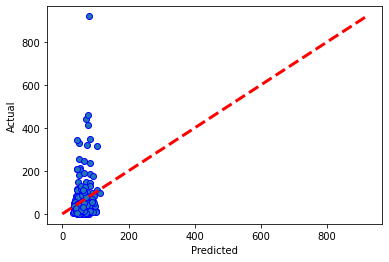

In [ ]:
# plot inferences
fig, ax = plt.subplots()
ax.scatter(yhat, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
feature_importances = pd.Series(regr.feature_importances_, index=regr.feature_names_in_)

In [ ]:
display(feature_importances.sort_values(ascending=False).head(20))

attribute_house_trained                      0.205295
age                                          0.089631
size                                         0.078159
breed_primary_Labrador Retriever             0.050783
attribute_special_needs                      0.047113
breed_primary_Chihuahua                      0.043890
good_with_dogs                               0.043376
coat_Short                                   0.041392
good_with_children                           0.039087
color_primary_Yellow / Tan / Blond / Fawn    0.036967
attribute_spayed_neutered                    0.030734
color_primary_Brindle                        0.030056
breed_mixed                                  0.027164
color_primary_Black                          0.026288
gender_Male                                  0.024991
gender_Female                                0.024532
breed_primary_Pit Bull Terrier               0.023754
attribute_shots_current                      0.019364
coat_Medium                 

In [ ]:
# evaluate performance
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

metrics_rfr = {
    "mse": mse,
    "mae": mae,
    "r2": r2,
}
# df_metrics = pd.DataFrame.from_dict(metrics, orient="index", columns=["RandomForestRegressor"])

# evaluate a baseline of always guessing the mean
yhat = np.ones((y_test.shape[0],1)) * y_train.mean()
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

metrics_baseline = {
    "mse": mse,
    "mae": mae,
    "r2": r2,
}

{'mse': 6639.2495572150265, 'mae': 47.10495410280951, 'r2': 0.03138087064681572}
{'mse': 6925.2875825080855, 'mae': 48.55794663048394, 'r2': -0.010350035931349755}


In [ ]:
df_metrics = pd.DataFrame.from_dict(data={"Baseline": metrics_baseline, "RandomForestRegressor": metrics_rfr})

In [ ]:
display(df_metrics)

,Baseline,RandomForestRegressor
mse,6925.287583,6639.249557
mae,48.557947,47.104954
r2,-0.010350,0.031381
